In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

from milligrad.module import Module
from milligrad.tensor import Tensor, topological_sort

from matplotlib import pyplot as plt

In [3]:
class MLP(Module):
    def __init__(self):
        self.w1 = Tensor.xavier(3, 4)
        self.w2 = Tensor.xavier(4, 2)
        self.b1 = Tensor.randn(4)
        self.b2 = Tensor.randn(2)
        
    def __call__(self, x):
        x = x @ self.w1 + self.b1
        x = x.relu()
        x = x @ self.w2 + self.b2
        return x.tanh()
    
    def parameters(self) -> list[Tensor]:
        return [self.w1, self.w2, self.b1, self.b2]
    
class Perceptron(Module):
    def __init__(self):
        self.w = Tensor.randn(3, 2)
        self.b = Tensor.randn(2)
        
    def __call__(self, x):
        return x @ self.w + self.b
    
    def parameters(self) -> list[Tensor]:
        return [self.w, self.b]

In [5]:


mlp = MLP()
y_hat = mlp(Tensor.randn(5, 3))

sorted_tensors = topological_sort(y_hat)
[x.name for x in sorted_tensors if x.name] # "" is falsy

['@', '+', 'relu', '@', '+', 'tanh']

In [6]:
x = Tensor.randn(5, 3)
y = Tensor.zeros(5, 2)

model = Perceptron()

losses = []
for i in range(1000):
    y_hat = model(x)
    loss = ((y - y_hat)**2).sum().sum()
    loss.backward()
    
    for param in model.parameters():
        param.data -= param.grad * 1e-3
        
    model.zero_grad()
    losses.append(loss.data)

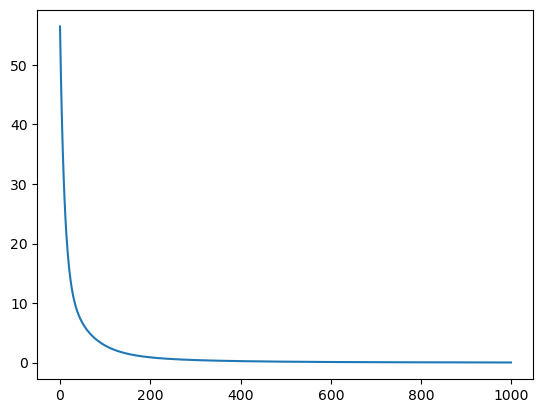

In [7]:
plt.plot(losses)